# POKEMON

# splitting dataset

In [ ]:
legge i dati da un file CSV sui Pokémon, carica i dati in un DataFrame utilizzando pandas e stampa le prime righe del 
DataFrame. La riga df.shape dovrebbe restituire la forma del DataFrame, ma è incompleta e non eseguirà correttamente 
l'operazione.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specifica il percorso del tuo file CSV
percorso_file_csv ="C:\\Users\\utente\\Pokemons.csv"

# Leggi il file CSV in un DataFrame
df = pd.read_csv(percorso_file_csv)

# Mostra le prime righe del DataFrame (opzionale)
print(df.head())
df.shape


   id        name      rank    generation evolves_from  type1   type2  hp  \
0   1   bulbasaur  ordinary  generation-i      nothing  grass  poison  45   
1   2     ivysaur  ordinary  generation-i    bulbasaur  grass  poison  60   
2   3    venusaur  ordinary  generation-i      ivysaur  grass  poison  80   
3   4  charmander  ordinary  generation-i      nothing   fire    None  39   
4   5  charmeleon  ordinary  generation-i   charmander   fire    None  58   

   atk  def  spatk  spdef  speed  total  height  weight  \
0   49   49     65     65     45    318       7      69   
1   62   63     80     80     60    405      10     130   
2   82   83    100    100     80    525      20    1000   
3   52   43     60     50     65    309       6      85   
4   64   58     80     65     80    405      11     190   

               abilities                                               desc  
0  overgrow chlorophyll   A strange seed was planted on its back at birt...  
1  overgrow chlorophyll   

(1017, 18)

#  grafico missing valeus

In [ ]:
Il codice crea un grafico a barre che mostra il numero di valori mancanti per ciascuna delle colonne

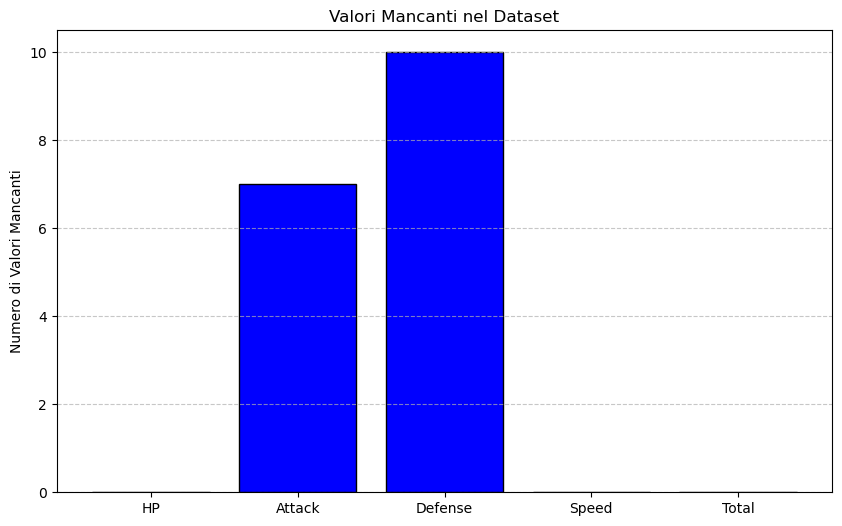

In [25]:
import matplotlib.pyplot as plt

# Dati dei valori mancanti
colonne = ['HP', 'Attack', 'Defense', 'Speed', 'Total']
valori_mancanti = [0, 7, 10, 0, 0]

# Visualizza un grafico a barre dei valori mancanti
plt.figure(figsize=(10, 6))
plt.bar(colonne, valori_mancanti, color='blue', edgecolor='black')
plt.title('Valori Mancanti nel Dataset')
plt.xlabel('')
plt.ylabel('Numero di Valori Mancanti')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# grafico outliers

In [ ]:
un grafico a dispersione dei dati della colonna " hp" del dataset dei Pokémon, evidenziando gli outliers in rosso e 
mostrando la media e tre deviazioni standard sopra e sotto la media con linee tratteggiate verdi e arancioni, 
rispettivamente.

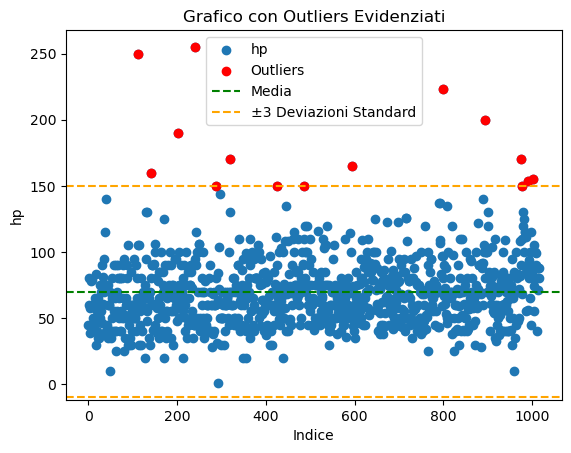

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importa il dataset
pokemon_data = pd.read_csv('C:\\Users\\utente\\Pokemons.csv')

# Calcola la media e la deviazione standard della colonna 'HP'
mean_value = pokemon_data['hp'].mean()
std_dev = pokemon_data['hp'].std()

# Trova gli outliers
outliers = pokemon_data[(pokemon_data['hp'] > mean_value + 3 * std_dev) | (pokemon_data['hp'] < mean_value - 3 * std_dev)]

# Crea un grafico a dispersione
plt.scatter(pokemon_data.index, pokemon_data['hp'], label='hp')

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers['hp'], color='red', label='Outliers')

# Aggiungi linee per la media e la deviazione standard
plt.axhline(y=mean_value, color='green', linestyle='--', label='Media')
plt.axhline(y=mean_value + 3 * std_dev, color='orange', linestyle='--', label='±3 Deviazioni Standard')
plt.axhline(y=mean_value - 3 * std_dev, color='orange', linestyle='--')

# Aggiungi etichette e legenda
plt.xlabel('Indice')
plt.ylabel('hp')
plt.title('Grafico con Outliers Evidenziati')
plt.legend()

# Mostra il grafico
plt.show()


# scalign ed encoding

In [ ]:
Il grafico rappresenta la distribuzione dei Punti Salute (HP) dei Pokémon dopo averli 
standardizzati (scaling) e codificati (encoding).


In [4]:
print(pokemon_data.columns)


Index(['id', 'name', 'rank', 'generation', 'evolves_from', 'type1', 'type2',
       'hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'total', 'height',
       'weight', 'abilities', 'desc'],
      dtype='object')


In [6]:
print(pokemon_data.head())


   id        name      rank    generation evolves_from  type1   type2  hp  \
0   1   bulbasaur  ordinary  generation-i      nothing  grass  poison  45   
1   2     ivysaur  ordinary  generation-i    bulbasaur  grass  poison  60   
2   3    venusaur  ordinary  generation-i      ivysaur  grass  poison  80   
3   4  charmander  ordinary  generation-i      nothing   fire    None  39   
4   5  charmeleon  ordinary  generation-i   charmander   fire    None  58   

   atk  def  spatk  spdef  speed  total  height  weight  \
0   49   49     65     65     45    318       7      69   
1   62   63     80     80     60    405      10     130   
2   82   83    100    100     80    525      20    1000   
3   52   43     60     50     65    309       6      85   
4   64   58     80     65     80    405      11     190   

               abilities                                               desc  
0  overgrow chlorophyll   A strange seed was planted on its back at birt...  
1  overgrow chlorophyll   

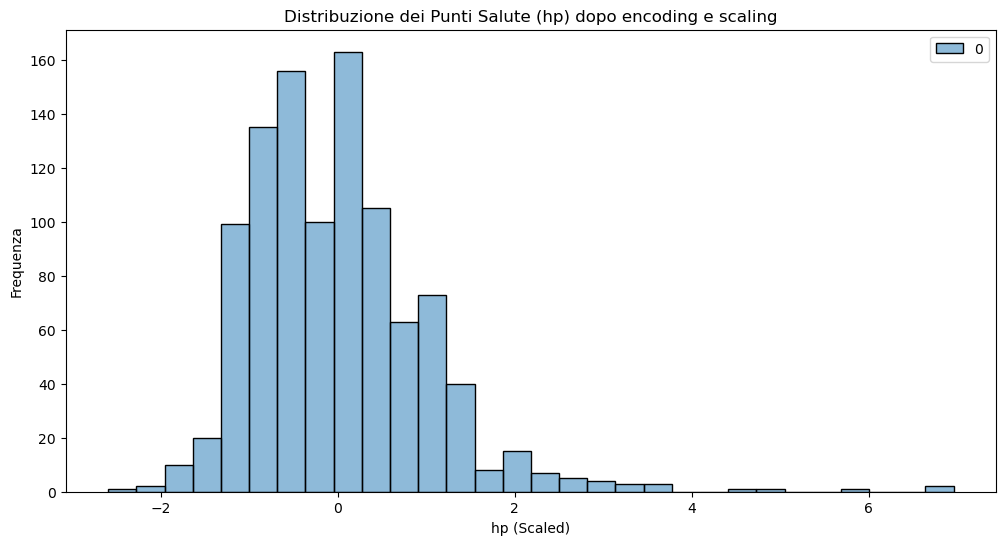

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Importa il dataset
pokemon_data = pd.read_csv('C:\\Users\\utente\\Pokemons.csv')

# Encoding delle variabili categoriche
label_encoder = LabelEncoder()
pokemon_data['Legendary'] = label_encoder.fit_transform(pokemon_data['rank'])

# Scaling dei dati
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pokemon_data[['hp']])

# Grafico delle distribuzioni dopo l'encoding e lo scaling
plt.figure(figsize=(12, 6))
sns.histplot(scaled_data, color='blue', bins=30)
plt.title('Distribuzione dei Punti Salute (hp) dopo encoding e scaling')
plt.xlabel('hp (Scaled)')
plt.ylabel('Frequenza')
plt.show()
